<center><h1 style="font-size:2em;color:#2467C0">Creación de pares </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="https://github.com/vazquezmanuel/Proyecto_particulas/blob/master/figuras/Creaciondepares.png?raw=true" align="middle" style="width:800px;"/></td>
<td>
    
$\gamma + \gamma\longrightarrow e^+ + e^- $

    
<br>
</td>
</tr>
</table>

La creación o producción de pares se da cuando dos fotones, a través de una partícula virtual (propagador), se condensan para crear un par electrón y positrón. Este proceso es un componente clave para explicar la equivalencia masa-energía, sin embargo, se desconocen los procesos más profundos mediante los cuales los fotones se transforman en pares materia-antimateria. 
A partir de la energía de los fotones involucrados, se produce una par partícula-antipartícula, generalmente un electrón y un positrón. Otros posibles resultados incluyen pares de muones y tau, y los fermiones elementales (quarks y leptones) en general. En todos los casos, es necesario que haya suficiente energía en el sistema para producir esos pares, que para un electrón en reposo es de 0,511 MeV, y se requiere la misma energía para producir el positrón.

## Definición de matrices y constantes a usar

### Tensor métrico $g_{\mu \nu}$

1    0    0    0

0    -1   0    0

0    0    -1   0

0    0    0    -1
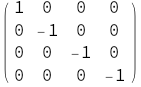

In [1]:
g[mu_, nu_] := Module[{},
    DiagonalMatrix[{1, -1, -1, -1}][[mu + 1,nu + 1]]
]
Table[g[mu, nu], {mu, 0, 3}, {nu, 0, 3}] // MatrixForm

### Matrices $\gamma$

1    0    0    0

0    1    0    0

0    0    -1   0

0    0    0    -1
0    0    0    1

0    0    1    0

0    -1   0    0

-1   0    0    0
0    0    0    -I

0    0    I    0

0    I    0    0

-I   0    0    0
0    0    1    0

0    0    0    -1

-1   0    0    0

0    1    0    0
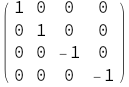
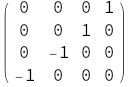
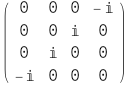
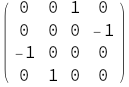

In [3]:
gamma[mu_] := Module[{beta, alpha1, alpha2, alpha3, gammas},
    beta = DiagonalMatrix[{1, 1, -1, -1}];
    alpha1 = Reverse[IdentityMatrix[4]];
    alpha2 = Reverse[DiagonalMatrix[{I, -I, I, -I}]];
    alpha3 = {{0, 0, 1, 0}, {0, 0, 0, -1}, {1, 0, 0, 0}, {0, -1, 0, 0}};
    gammas = {beta, beta . alpha1, beta . alpha2, beta . alpha3};
    gammas[[mu+1]]
]
MatrixForm[gamma[0]]
MatrixForm[gamma[1]]
MatrixForm[gamma[2]]
MatrixForm[gamma[3]]

### Espinores

0
p

 1
p

 2
p

 3
p
 0
p
 1

 1
p
 1

 2
p
 1

 3
p
 1
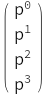
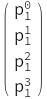

In [8]:
fourvector[a_, n_:{}] := Which[n==={}, Table[Superscript[a, j], {j, 0, 3}], True, Table[Subsuperscript[a, n, j], {j, 0, 3}]]
fourvector[p] // MatrixForm
fourvector[p, 1] // MatrixForm

0
Sqrt[m + p ]





0

      3
     p
------------
          0
Sqrt[m + p ]

  1      2
 p  + I p
------------
          0
Sqrt[m + p ]




0




          0
Sqrt[m + p ]

  1      2
 p  - I p
------------
          0
Sqrt[m + p ]

        3
       p
-(------------)
            0
  Sqrt[m + p ]
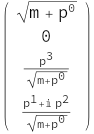
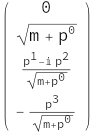

In [11]:
SpinorU[s_, p_, m_] := Module[{En, px, py, pz, pmas, pmenos, u1, u2},(
    {En, px, py, pz} = p;
    pmas = px + I * py;
    pmenos = px - I * py;
    u1 = Sqrt[En+m] {{1}, {0}, {pz/(En+m)}, {pmas/(En+m)}};
    u2 = Sqrt[En+m] {{0}, {1}, {pmenos/(En+m)}, {-pz/(En+m)}};
    {u1, u2}[[s]]
)]
SpinorU[1, fourvector[p], m] // MatrixForm
SpinorU[2, fourvector[p], m] // MatrixForm

3
     p
------------
          0
Sqrt[m + p ]

  1      2
 p  + I p
------------
          0
Sqrt[m + p ]




          0
Sqrt[m + p ]





0
  1      2
 p  - I p
------------
          0
Sqrt[m + p ]

        3
       p
-(------------)
            0
  Sqrt[m + p ]





0




          0
Sqrt[m + p ]
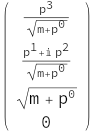
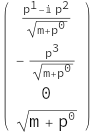

In [14]:
SpinorV[s_, p_, m_] := Module[{En, px, py, pz, pmas, pmenos, v1, v2},(
    {En, px, py, pz} = p;
    pmas = px + I * py;
    pmenos = px - I * py;
    v1 = Sqrt[En+m] {{pz/(En+m)}, {pmas/(En+m)}, {1}, {0}};
    v2 = Sqrt[En+m] {{pmenos/(En+m)}, {-pz/(En+m)}, {0}, {1}};
    {v1, v2}[[s]]
)]
SpinorV[1, fourvector[p], m] // MatrixForm
SpinorV[2, fourvector[p], m] // MatrixForm

In [17]:
SpinorBar[x_] := ConjugateTranspose[x].gamma[0]

0                          3            1      2
p            0            -p           -p  + I p

              0             1      2    3
0            p            -p  - I p    p

 3            1      2      0
p            p  - I p     -p           0

 1      2      3                         0
p  + I p     -p           0            -p
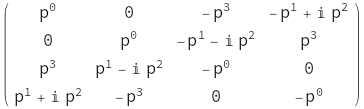

In [18]:
Slash[p_] := Sum[gamma[mu]*g[mu, nu] * p[[nu+1]], {mu, 0, 3}, {nu, 0, 3}]
Slash[fourvector[p]] // MatrixForm

## Cálculo de la amplitud

<td><img src="https://github.com/vazquezmanuel/Proyecto_particulas/blob/master/figuras/Creaciondepares.png?raw=true" align="middle" style="width:1000px;"/></td>

Para el cálculo de la amplitud, cada componente del diagrama aporta una expresión según se muestra en la siguiente tabla:

| Componente | Aportación |
|-|-|
| Electrón saliendo | $\bar{u}$ |
| Positrón saliendo | $v$ |
| Vértice | $-ieQ\gamma^\mu$ |
| Electrón (propagador) | $\frac{i\left(\cancel{q}+m\right)}{q^2-m^2}$ |
| Fotón entrando | $\epsilon_\mu$ |

Se propone que los momentos $\textbf{P}_1$ y $\textbf{P}_2$ sean opuestos y tengan componentes solo en el eje $z$. Del mismo modo, los momentos $\textbf{P}_3$ y $\textbf{P}_4$ también serán opuestos el uno del otro.

In [20]:
Map[Function[u, Conjugate[u] ^= u], {E1, E3, p1z, p3x, p3y, p3z, m, e}];
Map[Function[Sign[#] ^= 1], {m, E1, E3, e}];

In [22]:
p1 = {E1, 0, 0, p1z}
p2 = {E1, 0, 0, -p1z}
p3 = {E3, p3x, p3y, p3z}
p4 = {E3, -p3x, -p3y, -p3z}

{E1, 0, 0, p1z}
{E1, 0, 0, -p1z}
{E3, p3x, p3y, p3z}
{E3, -p3x, -p3y, -p3z}

Para definir al vector de polarización, se tiene que $\epsilon_0=0$. Las otras tres componentes serán vectores ortogonales a los momentos de sus respectivos fotones, para el caso de fotones con momentos restringidos al eje $z$ se tiene
$$\epsilon[1]=\left[0, 1, 0, 0\right]$$
$$\epsilon[2]=\left[0, 0, 1, 0\right]$$

In [26]:
epsilon[k_, mu_] := Module[{},
    {{0, 1, 0, 0}, {0, 0, 1, 0}}[[k, mu + 1]]
]

Con esto, se pueden hallar la amplitud como sigue:
$$i\mathscr{M}=\bar{u}\!\left(P_3,S_3\right)\left[-ieQ\gamma^\mu\right]\epsilon_\mu\left[\frac{i\left(\cancel{P_3}-\cancel{P_1}+m\right)}{\left(P_3-P_1\right)^2-m^2}\right]\left[-ieQ\gamma^\nu\right]\epsilon_\nu\ v\!\left(P_4,S_4\right)+\bar{u}\!\left(P_3,S_3\right)\left[-ieQ\gamma^\nu\right]\epsilon_\nu\left[\frac{i\left(\cancel{P_1}-\cancel{P_4}+m\right)}{\left(P_1-P_4\right)^2-m^2}\right]\left[-ieQ\gamma^\mu\right]\epsilon_\mu\ v\!\left(P_4,S_4\right)$$

$$-\frac{1}{e^2}\mathscr{M}=\bar{u}\!\left(P_3,S_3\right)\gamma^\mu\epsilon_\mu\left[\frac{\left(\cancel{P_3}-\cancel{P_1}+m\right)}{\left(P_3-P_1\right)^2-m^2}\right]\gamma^\nu\epsilon_\nu\ v\!\left(P_4,S_4\right)+\bar{u}\!\left(P_3,S_3\right)\gamma^\nu\epsilon_\nu\left[\frac{\left(\cancel{P_1}-\cancel{P_4}+m\right)}{\left(P_1-P_4\right)^2-m^2}\right]\gamma^\mu\epsilon_\mu\ v\!\left(P_4,S_4\right)$$
Se puede observar que se podría simplificar aún más la expresión, sin embargo, se dejará así para la fácil comprensión. Ambos sumandos se expresan a continuación

In [27]:
M1sinsuma[k1_, k2_, s3_, s4_, mu_, nu_] := (epsilon[k1, mu] epsilon[k2, nu] SpinorBar[SpinorU[s3, p3, m]].gamma[mu].((Slash[p3-p1] + m IdentityMatrix[4])/((p3-p1).(p3-p1)-m^2)).gamma[nu].SpinorV[s4, p4, m])[[1,1]]

In [28]:
M2sinsuma[k1_, k2_, s3_, s4_, mu_, nu_] := (epsilon[k2, nu] epsilon[k1, mu] SpinorBar[SpinorU[s3, p3, m]].gamma[nu].((Slash[p3-p2] + m IdentityMatrix[4])/((p3-p2).(p3-p2)-m^2)).gamma[mu].SpinorV[s4, p4, m])[[1,1]]

Sumando sombre $\mu$ y $\nu$ para obtener

In [29]:
M1sumamunu[k1_, k2_, s3_, s4_] := Sum[M1sinsuma[k1, k2, s3, s4, mu, nu], {mu, 0, 3}, {nu, 0, 3}]

In [30]:
M2sumamunu[k1_, k2_, s3_, s4_] := Sum[M2sinsuma[k1, k2, s3, s4, mu, nu], {mu, 0, 3}, {nu, 0, 3}]

En el lado izquierdo de la igualdad cuando se calculó $\mathscr{M}$ se tiene un factor $-1/e^2$, agregando este factor se tiene

In [31]:
M[k1_, k2_, s3_, s4_] := -e^2 (M1sumamunu[k1, k2, s3, s4] + M2sumamunu[k1, k2, s3, s4])

Ahora solo queda sumar sobre los espines, para ello se deberá agregar un factor $1/4$ a la suma, esto es:

4                    (E1 - E3 + m) Sqrt[E3 + m]
(e  ((p3z (-(----------------------------------------------) - 
                       2    2      2      2               2
             (-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z)
 
                              (p3x - I p3y) (-p3x + I p3y)
>             ------------------------------------------------------------- + 
                                      2    2      2      2               2
              Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z) )
 
                                     (p1z - p3z) p3z
>             -------------------------------------------------------------)) / 
                                      2    2      2      2               2
              Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z) )
 
>         Sqrt[E3 + m] + Sqrt[E3 + m] 
 
                                  (-E1 + E3 + m) p3z
>         (-(-------------------------------------------------------------) + 
                                     2    2      2      2               2
             Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z) )
 
                      Sqrt[E3 + m] (-p1z + p3z)
>           ----------------------------------------------) + 
                      2    2      2      2               2
            (-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z)
 
>        ((-p3x - I p3y) (
 
                                    (-p3x - I p3y) p3z
>              ------------------------------------------------------------- - 
                                       2    2      2      2               2
               Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z) )
 
                               (p3x - I p3y) (-p1z + p3z)
>             -------------------------------------------------------------)) / 
                                      2    2      2      2               2
              Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (-p1z + p3z) )
 
                                          (E1 - E3 + m) Sqrt[E3 + m]
>         Sqrt[E3 + m] + (p3z (-(---------------------------------------------) - 
                                           2    2      2      2              2
                                 (-E1 + E3)  - m  + p3x  + p3y  + (p1z + p3z)
 
                              (p3x - I p3y) (-p3x + I p3y)
>             ------------------------------------------------------------ + 
                                      2    2      2      2              2
              Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (p1z + p3z) )
 
                                    (-p1z - p3z) p3z
>             ------------------------------------------------------------)) / 
                                      2    2      2      2              2
              Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (p1z + p3z) )
 
>         Sqrt[E3 + m] + Sqrt[E3 + m] 
 
                                  (-E1 + E3 + m) p3z
>         (-(------------------------------------------------------------) + 
                                     2    2      2      2              2
             Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (p1z + p3z) )
 
                      Sqrt[E3 + m] (p1z + p3z)
>           ---------------------------------------------) + 
                      2    2      2      2              2
            (-E1 + E3)  - m  + p3x  + p3y  + (p1z + p3z)
 
                                               (-p3x - I p3y) p3z
>        ((-p3x - I p3y) (------------------------------------------------------------ - 
                                                  2    2      2      2              2
                          Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  + p3y  + (p1z + p3z) )
 
                               (p3x - I p3y) (p1z + p3z)
>             ------------------------------------------------------------)) / 
                                      2    2      2      2              2
              Sqrt[E3 + m] ((-E1 + E3)  - m  + p3x  
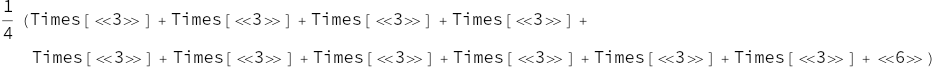
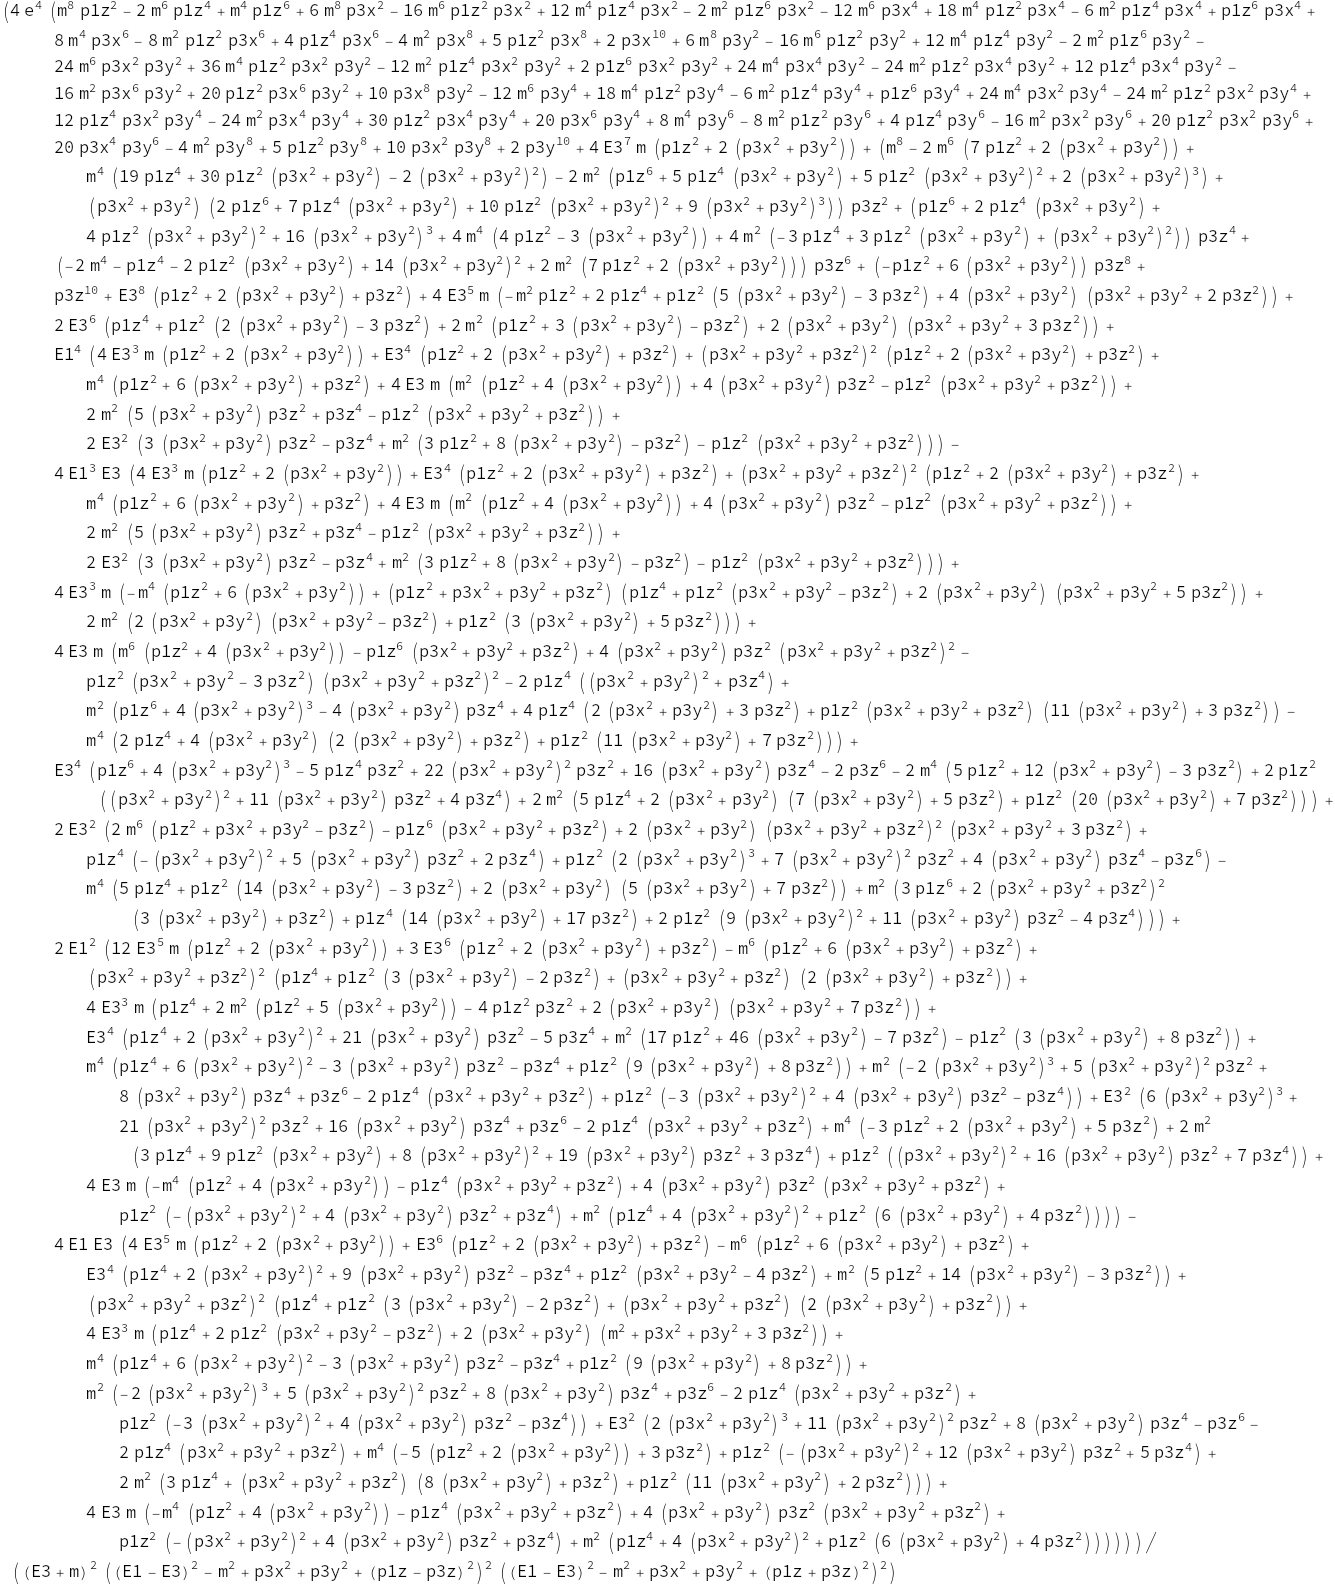

In [32]:
M2 = Sum[M[k1, k2, s3, s4] Conjugate[M[k1, k2, s3, s4]], {k1, 1, 2}, {k2, 1, 2}, {s3, 1, 2}, {s4, 1, 2}] / 4
M2 = FullSimplify[M2]

Sabiendo que $P_3^2=P_3\cdot P_3 = E_3^2-p_{3x}^2-p_{3y}^2-p_{3z}^2=m^2$, entonces $p_{3x}^2+p_{3y}^2+p_{3z}^2=E_3^2-m^2$

2      2      2      2    2
{p3x  + p3y  + p3z  -> E3  - m }
    4   8    2      6    4    4    6      8    2       6    2    2       4    4    2
(4 e  (m  p1z  - 2 m  p1z  + m  p1z  + 6 m  p3x  - 16 m  p1z  p3x  + 12 m  p1z  p3x  - 
 
           2    6    2       6    4       4    2    4      2    4    4      6    4
>       2 m  p1z  p3x  - 12 m  p3x  + 18 m  p1z  p3x  - 6 m  p1z  p3x  + p1z  p3x  + 
 
           4    6      2    2    6        4    6      2    8        2    8        10
>       8 m  p3x  - 8 m  p1z  p3x  + 4 p1z  p3x  - 4 m  p3x  + 5 p1z  p3x  + 2 p3x   + 
 
           8    2       6    2    2       4    4    2      2    6    2
>       6 m  p3y  - 16 m  p1z  p3y  + 12 m  p1z  p3y  - 2 m  p1z  p3y  - 
 
            6    2    2       4    2    2    2       2    4    2    2
>       24 m  p3x  p3y  + 36 m  p1z  p3x  p3y  - 12 m  p1z  p3x  p3y  + 
 
             6    2    2       4    4    2       2    2    4    2         4    4    2
>       2 p1z  p3x  p3y  + 24 m  p3x  p3y  - 24 m  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 
 
            2    6    2         2    6    2         8    2       6    4
>       16 m  p3x  p3y  + 20 p1z  p3x  p3y  + 10 p3x  p3y  - 12 m  p3y  + 
 
            4    2    4      2    4    4      6    4       4    2    4
>       18 m  p1z  p3y  - 6 m  p1z  p3y  + p1z  p3y  + 24 m  p3x  p3y  - 
 
            2    2    2    4         4    2    4       2    4    4         2    4    4
>       24 m  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 24 m  p3x  p3y  + 30 p1z  p3x  p3y  + 
 
              6    4      4    6      2    2    6        4    6       2    2    6
>       20 p3x  p3y  + 8 m  p3y  - 8 m  p1z  p3y  + 4 p1z  p3y  - 16 m  p3x  p3y  + 
 
              2    2    6         4    6      2    8        2    8         2    8
>       20 p1z  p3x  p3y  + 20 p3x  p3y  - 4 m  p3y  + 5 p1z  p3y  + 10 p3x  p3y  + 
 
             10       7       2         2      2
>       2 p3y   + 4 E3  m (p1z  + 2 (p3x  + p3y )) + 
 
          8      6       2         2      2
>       (m  - 2 m  (7 p1z  + 2 (p3x  + p3y )) + 
 
            4        4         2     2      2          2      2 2
>          m  (19 p1z  + 30 p1z  (p3x  + p3y ) - 2 (p3x  + p3y ) ) - 
 
              2     6        4     2      2         2     2      2 2
>          2 m  (p1z  + 5 p1z  (p3x  + p3y ) + 5 p1z  (p3x  + p3y )  + 
 
                    2      2 3        2      2
>             2 (p3x  + p3y ) ) + (p3x  + p3y ) 
 
                  6        4     2      2          2     2      2 2         2      2 3
>           (2 p1z  + 7 p1z  (p3x  + p3y ) + 10 p1z  (p3x  + p3y )  + 9 (p3x  + p3y ) )) 
 
            2       6        4     2      2         2     2      2 2
>        p3z  + (p1z  + 2 p1z  (p3x  + p3y ) + 4 p1z  (p3x  + p3y )  + 
 
                  2      2 3      4       2         2      2
>          16 (p3x  + p3y )  + 4 m  (4 p1z  - 3 (p3x  + p3y )) + 
 
              2        4        2     2      2        2      2 2      4
>          4 m  (-3 p1z  + 3 p1z  (p3x  + p3y ) + (p3x  + p3y ) )) p3z  + 
 
             4      4        2     2      2           2      2 2
>       (-2 m  - p1z  - 2 p1z  (p3x  + p3y ) + 14 (p3x  + p3y )  + 
 
              2       2         2      2       6        2         2      2      8
>          2 m  (7 p1z  + 2 (p3x  + p3y ))) p3z  + (-p1z  + 6 (p3x  + p3y )) p3z  + 
 
           10     8     2         2      2       2
>       p3z   + E3  (p1z  + 2 (p3x  + p3y ) + p3z ) + 
 
            3
>       8 E1  E3 (E3 + m) (-2 (E3 + m) 
 
               2     2      2     2     2         2      2
>           (E3  (p3x  + p3y ) + m  (p1z  + 2 (p3x  + p3y ))) - 
 
              3     2         2    3            2      2            2      2      2
>          (E3  - E3  m - E3 m  + m  + 3 E3 (p3x  + p3y ) + 5 m (p3x  + p3y )) p3z  + 
 
                       4        4
>          (E3 - m) p3z ) + 2 E1  (E3 + m) 
 
                        2     2      2     2     2         2      2
>        (2 (E3 + m) (E3  (p3x  + p3y ) + 
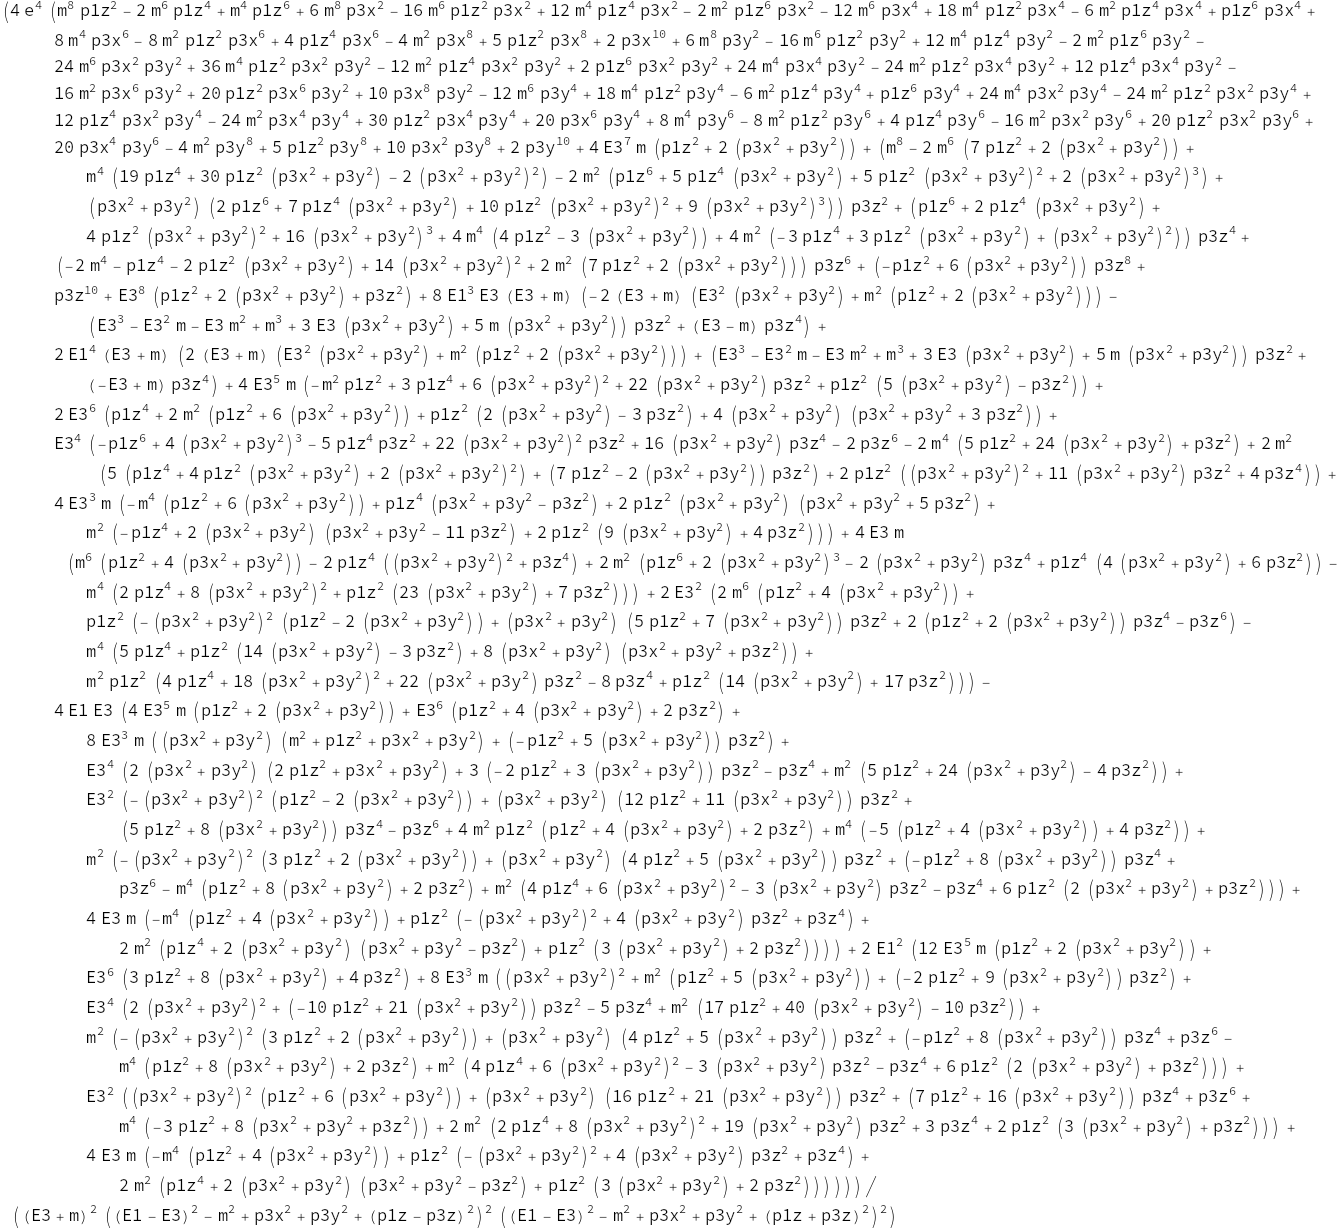

In [34]:
sustp3 = {p3x^2+p3y^2+p3z^2->E3^2-m^2}
M2 = FullSimplify[M2/.sustp3]

Se observan muchos términos $p_{3x}^2+p_{3y}^2$, se hará la debida sustitución para dejar todo en términos de masa, energía y $p_{3z}^2$:
$$p_{3x}^2+p_{3y}^2=E_3^2-m^2-p_{3z}^2$$

2      2      2    2      2
{p3x  + p3y  -> E3  - m  - p3z }
    4       10        9      8    2      6    4    4    6      8    2
(4 e  (14 E3   + 32 E3  m + m  p1z  - 2 m  p1z  + m  p1z  + 6 m  p3x  - 
 
            6    2    2       4    4    2      2    6    2       6    4
>       16 m  p1z  p3x  + 12 m  p1z  p3x  - 2 m  p1z  p3x  - 12 m  p3x  + 
 
            4    2    4      2    4    4      6    4      4    6      2    2    6
>       18 m  p1z  p3x  - 6 m  p1z  p3x  + p1z  p3x  + 8 m  p3x  - 8 m  p1z  p3x  + 
 
             4    6      2    8        2    8        10      8    2       6    2    2
>       4 p1z  p3x  - 4 m  p3x  + 5 p1z  p3x  + 2 p3x   + 6 m  p3y  - 16 m  p1z  p3y  + 
 
            4    4    2      2    6    2       6    2    2       4    2    2    2
>       12 m  p1z  p3y  - 2 m  p1z  p3y  - 24 m  p3x  p3y  + 36 m  p1z  p3x  p3y  - 
 
            2    4    2    2        6    2    2       4    4    2
>       12 m  p1z  p3x  p3y  + 2 p1z  p3x  p3y  + 24 m  p3x  p3y  - 
 
            2    2    4    2         4    4    2       2    6    2         2    6    2
>       24 m  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 16 m  p3x  p3y  + 20 p1z  p3x  p3y  + 
 
              8    2       6    4       4    2    4      2    4    4      6    4
>       10 p3x  p3y  - 12 m  p3y  + 18 m  p1z  p3y  - 6 m  p1z  p3y  + p1z  p3y  + 
 
            4    2    4       2    2    2    4         4    2    4       2    4    4
>       24 m  p3x  p3y  - 24 m  p1z  p3x  p3y  + 12 p1z  p3x  p3y  - 24 m  p3x  p3y  + 
 
              2    4    4         6    4      4    6      2    2    6        4    6
>       30 p1z  p3x  p3y  + 20 p3x  p3y  + 8 m  p3y  - 8 m  p1z  p3y  + 4 p1z  p3y  - 
 
            2    2    6         2    2    6         4    6      2    8        2    8
>       16 m  p3x  p3y  + 20 p1z  p3x  p3y  + 20 p3x  p3y  - 4 m  p3y  + 5 p1z  p3y  + 
 
              2    8        10      2     6       4    2      2    4      6     2
>       10 p3x  p3y  + 2 p3y   + 4 m  (4 m  - 16 m  p1z  + 9 m  p1z  - p1z ) p3z  + 
 
             6       4    2       2    4      6     4
>       (48 m  - 72 m  p1z  + 10 m  p1z  - p1z ) p3z  + 
 
               4      2    2      4     6        2        2     8        10
>       4 (11 m  - 7 m  p1z  + p1z ) p3z  + (14 m  - 5 p1z ) p3z  + 2 p3z   + 
 
             7      2      2      2      8      2         2         2
>       32 E3  m (-m  + p1z  + p3z ) + E3  (14 m  + 11 p1z  + 26 p3z ) + 
 
            3           3        2 2        4      2    2      4     2
>       8 E3  m (5 (-2 m  + m p1z )  + (36 m  - 8 m  p1z  + p1z ) p3z  + 
 
                 2      2     4
>          4 (4 m  - p1z ) p3z ) + 8 E3 m 
 
             2     2      2 3       4      2      2     2         4      4     4
>        (-(m  (2 m  - p1z ) ) + 8 m  (-2 m  + p1z ) p3z  - 2 (4 m  + p1z ) p3z ) + 
 
            2      2                          2      2 2
>       2 E3  (-4 m  (m - p1z) (m + p1z) (-2 m  + p1z )  + 
 
                 6       4    2       2    4      6     2
>          (-40 m  + 72 m  p1z  - 16 m  p1z  + p1z ) p3z  - 
 
                  4       2    2        4     4           2        2     6        8
>          2 (25 m  - 17 m  p1z  + 5 p1z ) p3z  + 2 (-14 m  + 5 p1z ) p3z  - 5 p3z ) - 
 
            5        4      4        4      2     2        2
>       8 E3  m (12 m  - p1z  + 8 p3z  - 4 m  (p1z  - 6 p3z )) + 
 
            4         2    4      4        4    2     2        2      2   2      2
>       4 E1  (E3 + m)  (E3  - 2 m  - 2 p3z  + m  (p1z  - 4 p3z ) + E3  (m  + p3z )) - 
 
             3            2    4      4        4    2     2        2
>       16 E1  E3 (E3 + m)  (E3  - 2 m  - 2 p3z  + m  (p1z  - 4 p3z ) + 
 
             2   2      2                      2      2      2      2
>          E3  (m  + p3z )) - 16 E1 E3 (E3 + m)  (2 E3  - 2 m  + p1z ) 
 
            4      4        4    2     2        2      2   2      2
>        (E3  - 2 m  - 2 p3z  + m  (p1z  - 4 p3z ) + E3  (m  + p3z )) + 
 

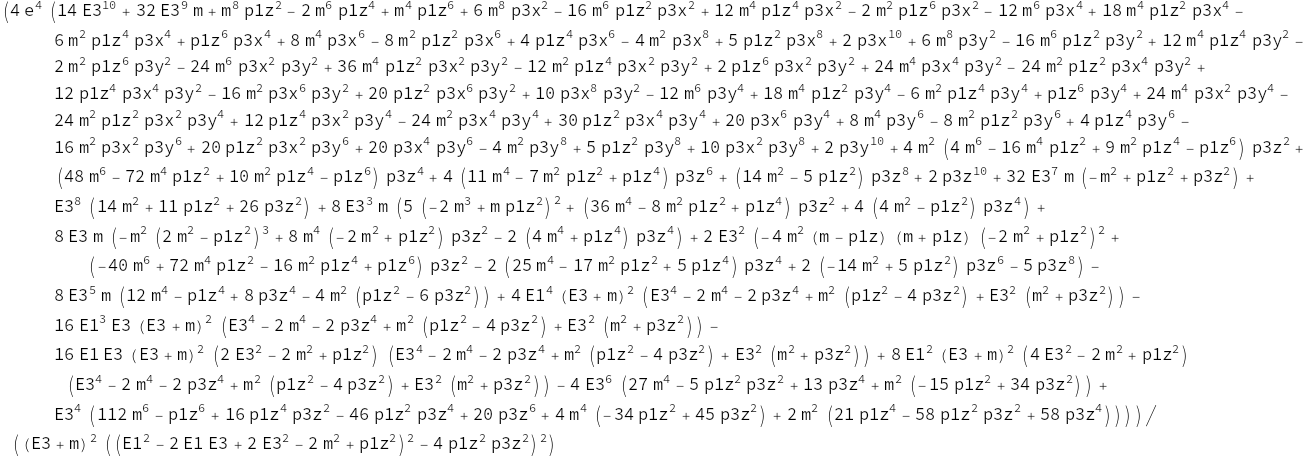

In [36]:
sustp3v2 = {p3x^2+p3y^2->E3^2-m^2-p3z^2}
M2 = FullSimplify[M2/.sustp3v2]

Del mismo modo, para los fotones se tiene:
$$P_1^2=P_1\cdot P_1 = E_1^2-p_{1z}^2=0$$
Entonces $p_{1z}=E_1^2$

2      2     4      4     6      6
{p1z  -> E1 , p1z  -> E1 , p1z  -> E1 }
  4        5     2         2                             3    2    2      2
(e  (-32 E1  E3 m  (E3 + m)  - 32 E1 E3 (E3 - m) (E3 + m)  (E3  - m  - p3z ) 
 
            2       2      2          3            2
>        (E3  + 2 (m  + p3z )) - 32 E1  E3 (E3 + m)  
 
            4      4      2    2        4     2     2      2
>        (E3  - 3 m  - 4 m  p3z  - 2 p3z  + E3  (2 m  + p3z )) + 
 
          6     4          3       4       2      2 2      4       2     2      2
>       E1  (-E3  + 32 E3 m  + 13 m  + (p3x  + p3y )  - p3z  + 2 E3  (6 m  + p3z ) - 
 
              2     2      2        2
>          2 m  (p3x  + p3y  + 2 p3z )) + 
 
          2       8        7         8       6     2      2          2      2 4
>       E1  (43 E3  + 96 E3  m + 33 m  - 16 m  (p3x  + p3y ) + 5 (p3x  + p3y )  - 
 
                8        5     2      2        6      2         2
>          5 p3z  + 64 E3  m (m  + p3z ) + 4 E3  (27 m  + 13 p3z ) + 
 
              4        2      2 2         4        4       4        2    2         4
>          2 m  (9 (p3x  + p3y )  - 20 p3z ) - 2 E3  (100 m  + 114 m  p3z  + 55 p3z ) - 
 
                3      5       3    2          4
>          32 E3  (10 m  + 11 m  p3z  + 5 m p3z ) + 
 
                     7      5    2      3    4       2         2      2 3        6
>          32 E3 (5 m  + 6 m  p3z  + 2 m  p3z ) + 4 m  (-2 (p3x  + p3y )  - 7 p3z ) + 
 
               2      6      2    4        6      4     2        2
>          4 E3  (-4 m  + 9 m  p3z  + 5 p3z  - 8 m  (p1z  - 2 p3z ))) + 
 
               10        9         2      2     2      2      2 2
>       2 (7 E3   + 16 E3  m + (p3x  + p3y ) (-m  + p3x  + p3y )  
 
                4       2      2 2       8    2       6    4       4    6      2    8
>           (3 m  + (p3x  + p3y ) ) + 8 m  p3z  + 24 m  p3z  + 22 m  p3z  + 7 m  p3z  + 
 
              10        7      2      2           5   2      2 2
>          p3z   + 16 E3  m (-m  + p3z ) - 32 E3 m  (m  + p3z )  + 
 
                3  3   2      2      2        2      8     2         2
>          16 E3  m  (m  + p3z ) (5 m  + 4 p3z ) + E3  (7 m  + 13 p3z ) - 
 
               6      4       2    2         4         5     5      3    2          4
>          2 E3  (27 m  + 34 m  p3z  + 13 p3z ) - 16 E3  (3 m  + 6 m  p3z  + 2 m p3z ) + 
 
               4      6       4    2       2    4        6
>          2 E3  (28 m  + 45 m  p3z  + 29 m  p3z  + 5 p3z ) - 
 
             2      8       4    4       2    6        8      6        2        2
>          E3  (16 m  + 50 m  p3z  + 28 m  p3z  + 5 p3z  + 8 m  (-2 p1z  + 5 p3z ))) + 
 
            4      6        5         6      4     2      2      2
>       2 E1  (6 E3  + 16 E3  m - 21 m  + 6 m  (p3x  + p3y  - p3z ) + 
 
                3       2      2        4     2        2
>          16 E3  m (4 m  + p3z ) + 7 E3  (7 m  + 2 p3z ) + 
 
            2         2      2 2        4              5      3    2          4
>          m  (-3 (p3x  + p3y )  - 7 p3z ) - 16 E3 (4 m  + 3 m  p3z  + 2 m p3z ) + 
 
                  2      2 3      6        2   4         4    2        2         2
>          2 ((p3x  + p3y )  + p3z ) - 2 E3  (m  + 11 p3z  + m  (-2 p1z  + 17 p3z )))))\
 
                  2     2             2    2 2     2    2 2
>    / (4 (E3 + m)  ((E1  - E1 E3 + E3  - m )  - E1  p3z ) )
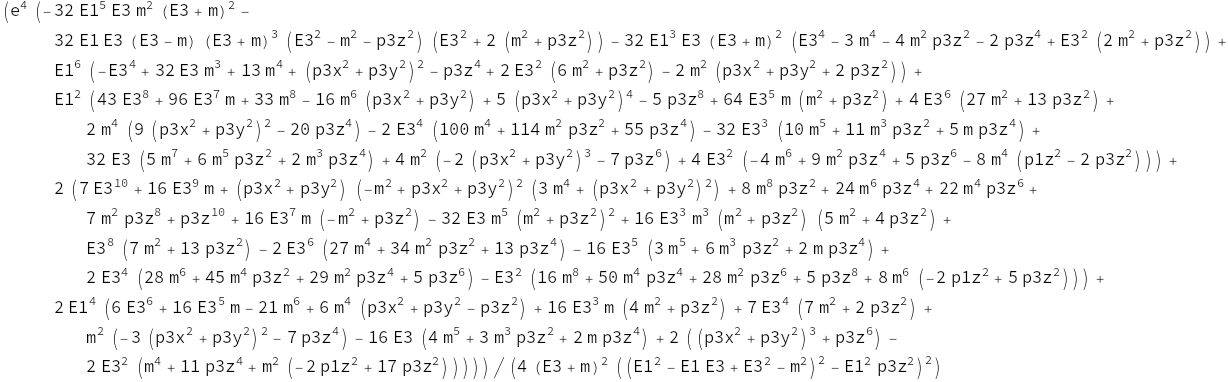

In [38]:
(* Se ponen todas las variables vistas, debido al algoritmo del Wolfram Engine *)
sustp1 = {p1z^2->E1^2, p1z^4->E1^4, p1z^6->E1^6}
M2 = FullSimplify[M2/.sustp1]

Se observa que se puede aplicar de nuevo algunas sustituciones ya definidas, entonces:

4       5     2         2     6  2    2               2
(2 e  (-4 E1  E3 m  (E3 + m)  + E1  m  (E3  + 4 E3 m + 2 m ) + 
 
          4      6       5          4  2        3  3       2  4          5      6
>       E1  (2 E3  + 4 E3  m + 10 E3  m  + 16 E3  m  + 4 E3  m  - 16 E3 m  - 8 m  + 
 
             2  2    2             2    2      2     2             2    4
>          E3  m  p1z  + 2 (E3 + m)  (E3  - 3 m ) p3z  - 4 (E3 + m)  p3z ) + 
 
             10       9         7  3       6  4       5  5       4  6        3  7
>       2 (E3   + 2 E3  m - 2 E3  m  - 4 E3  m  - 6 E3  m  + 2 E3  m  + 10 E3  m  + 
 
               2  8         9      10       2  6    2
>          3 E3  m  - 4 E3 m  - 2 m   + 2 E3  m  p1z  + 
 
                   2         4    2      2     2             2         4    4
>          (E3 - m)  (E3 + m)  (E3  - 4 m ) p3z  - 2 (E3 - m)  (E3 + m)  p3z ) + 
 
            2      8       7         6  2       5  3       4  4        3  5       2  6
>       2 E1  (3 E3  + 6 E3  m + 5 E3  m  + 4 E3  m  - 8 E3  m  - 20 E3  m  - 7 E3  m  + 
 
                  7      8       2  4    2           2      4        2  2      4     2
>          10 E3 m  + 5 m  - 2 E3  m  p1z  + (E3 + m)  (2 E3  - 11 E3  m  + 6 m ) p3z  - 
 
                   2      2      2     4
>          (E3 + m)  (5 E3  - 2 m ) p3z ) - 
 
                                 3    2    2      2     2       2      2
>       4 E1 E3 (E3 - m) (E3 + m)  (E3  - m  - p3z ) (E3  + 2 (m  + p3z )) - 
 
            3            2    4      4      2    2        4     2     2      2
>       4 E1  E3 (E3 + m)  (E3  - 3 m  - 4 m  p3z  - 2 p3z  + E3  (2 m  + p3z )))) / 
 
             2     2             2    2 2     2    2 2
>   ((E3 + m)  ((E1  - E1 E3 + E3  - m )  - E1  p3z ) )
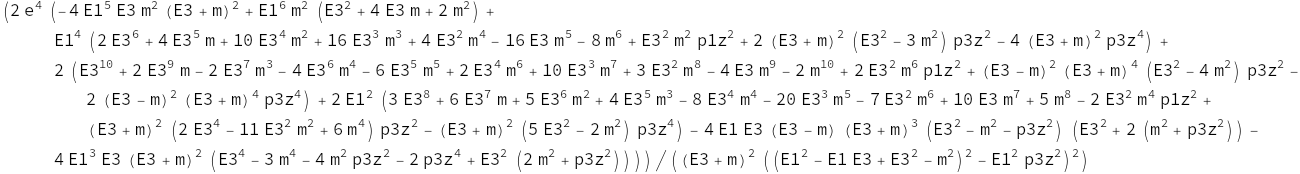

In [41]:
M2 = FullSimplify[M2/.sustp3v2]

4     2             2    2 2    4      2     2   2      4
(4 e  ((E1  - E1 E3 + E3  - m )  (E3  + (E1  + E3 ) m  - 2 m ) + 
 
                  2   2    2     2
>       ((E1 - E3)  E3  (E1  + E3 ) + 
 
                 4       3           2   2           3       4   2
>          (-3 E1  + 8 E1  E3 - 11 E1  E3  + 10 E1 E3  - 6 E3 ) m  + 
 
                2                 2   4      6     2
>          (6 E1  - 8 E1 E3 + 9 E3 ) m  - 4 m ) p3z  + 
 
              4       3                                       2    2 2
>       (-2 E1  + 4 E1  E3 + 4 E1 E3 (E3 - m) (E3 + m) - 2 (E3  - m )  + 
 
             2       2      2      4         2             2    2 2     2    2 2
>          E1  (-5 E3  + 2 m )) p3z )) / ((E1  - E1 E3 + E3  - m )  - E1  p3z )
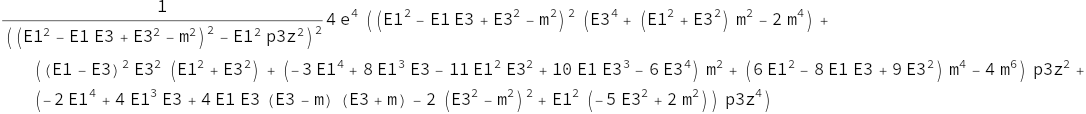

In [42]:
M2 = FullSimplify[M2/.sustp1]

Con este resultado, se pueden hallar algunas expresiones interesantes

4    4    2             2 2            2   2    2     2     2
(4 e  (E3  (E1  - E1 E3 + E3 )  + (E1 - E3)  E3  (E1  + E3 ) p3z  + 
 
              4       3          2   2          3       4     4
>       (-2 E1  + 4 E1  E3 - 5 E1  E3  + 4 E1 E3  - 2 E3 ) p3z )) / 
 
        2             2 2     2    2 2
>   ((E1  - E1 E3 + E3 )  - E1  p3z )
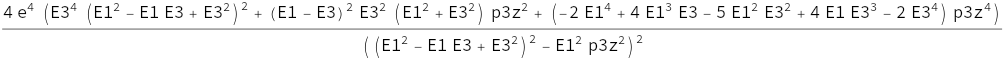

In [43]:
(* Despreciando la masa *)
FullSimplify[M2/.{m->0}]

4    4      2     2   2      4
4 e  (E3  + (E1  + E3 ) m  - 2 m )
----------------------------------
       2             2    2 2
    (E1  - E1 E3 + E3  - m )
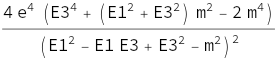

In [45]:
(* Si el par electrón- positrón no tiene componente de momento en p3z (son ortogonales a los fotones) *)
FullSimplify[M2/.{p3z^2->0, p3z^4->0}]

4   4
      4 e  E3
--------------------
   2             2 2
(E1  - E1 E3 + E3 )
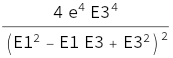

In [47]:
(* Coprobando con ambas consideraciones *)
FullSimplify[M2/.{m->0, p3z^2->0, p3z^4->0}]

Lo anterior fue trabajando con los momentos y haciendo las sustituciones mostradas, otra posibilidad estaba en dejar la amplitud en término de las variables de Mandelstam, lo cual se podría hacer más adelante.